                                              DATA 601: FINAL PROJECT

                                     VEHICLES AND CRASHES RECORD IN CHICAGO

Project Name: Analyzing the vechicles/crash record with people record in Chicago from the year 2015-Present. The owner of this data is Chicago police department. 

The dataset-I (Traffic crashes within the city street limits of Chicago) is taken from the below source file

https://data.cityofchicago.org/api/views/85ca-t3if/rows.csv

The dataset-II (Vehicles identified in crashes involved in traffic crash) is taken from the below source file

https://data.cityofchicago.org/api/views/68nd-jvt3/rows.csv

The dataset-III (Person/driver details identified in the crash in Chicago) is taken from the below source file

https://data.cityofchicago.org/api/views/u6pd-qa9d/rows.csv

The dataset selected for the project is free of cost. Accessing this data from https://data.cityofchicago.org/ does not violate any laws. Based on Google search, these dataset are analyzed in different angle. My analysis is completely new based on my own creativity ONLY by merging all these three datasets. This was completely done by my own efforts using previous class notes, googling of python syntaxes online. 

The data is a live set of data. So, I have concluded and given hypothesis based on the recent update in the data. 

Size of data taken for analysis(rows, columns): Number of rows: 2,334,369 Number of columns: 19 

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [2]:
#To ignore warnings
import warnings
warnings.filterwarnings("ignore")

#https://stackoverflow.com/questions/14463277/how-to-disable-python-warnings

In [3]:
#Next, the Excel file will be assigned to a Pandas dataframe, 'crash'.
crash = pd.read_csv(r"C:\Users\jeans\Downloads\Traffic_Crashes_-_Crashes.csv")

In [4]:
#Reading the data
crash.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,NaN,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,3.0,0.0,17,4,7,41.919664,-87.773288,POINT (-87.773287883007 41.919663832993)
1,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,JA329216,NaN,06/30/2017 04:00:00 PM,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,3.0,0.0,16,6,6,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)
2,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,JD292400,NaN,07/10/2020 10:25:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,3.0,0.0,10,6,7,41.773456,-87.585022,POINT (-87.585022352022 41.773455972008)
3,f8960f698e870ebdc60b521b2a141a5395556bc3704191...,JD293602,NaN,07/11/2020 01:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,...,0.0,0.0,3.0,0.0,1,7,7,41.802119,-87.622115,POINT (-87.622114914961 41.802118543011)
4,8eaa2678d1a127804ee9b8c35ddf7d63d913c14eda61d6...,JD290451,NaN,07/08/2020 02:00:00 PM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,14,4,7,NaN,NaN,NaN


In [5]:
#The shape of the file is duly known by knowing the number of rows and columns.Hence the shape of the datframe 'crash' is
crash.shape

(500782, 49)

In [7]:
#Next, the second dataset is taken and the Excel file will be assigned to a Pandas dataframe, 'vehicles'.
vehicles = pd.read_csv(r"C:\Users\jeans\Downloads\Traffic_Crashes_-_Vehicles.csv")

In [8]:
#Reading the data
vehicles.head()

,CRASH_UNIT_ID,CRASH_RECORD_ID,RD_NO,CRASH_DATE,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,CMRC_VEH_I,MAKE,...,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS
0,829999,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,JD124535,01/22/2020 06:25:00 AM,1,DRIVER,NaN,796949.0,NaN,INFINITI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,749947,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,1,DRIVER,NaN,834816.0,NaN,HONDA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,749949,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,2,PARKED,NaN,834819.0,NaN,TOYOTA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,749950,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,3,PARKED,NaN,834817.0,NaN,GENERAL MOTORS CORPORATION (GMC),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,871921,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,04/13/2020 10:50:00 PM,2,DRIVER,NaN,827212.0,NaN,BUICK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#The shape of the file is duly known by knowing the number of rows and columns.Hence the shape of the datframe 'vehicles' is
vehicles.shape

(1023061, 72)

In [10]:
#Next, the third dataset is taken and the Excel file will be assigned to a Pandas dataframe, 'people'.
people = pd.read_csv(r"C:\Users\jeans\Downloads\Traffic_Crashes_-_People.csv")

In [11]:
#Reading the data
people.head()

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,RD_NO,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,827212.0,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,HY484534,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,NaN,...,NaN,IMPROPER BACKING,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,HY484750,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,HY484778,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [12]:
#The shape of the file is duly known by knowing the number of rows and columns.Hence the shape of the datframe 'people' is
people.shape

(1106171, 30)

In [13]:
#The size of the file is
crash.size

24538318

In [14]:
#Checking number of null values in crash dataset
crash.isnull().sum()

CRASH_RECORD_ID                       0
RD_NO                              4316
CRASH_DATE_EST_I                 463072
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                         301816
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                       12302
CRASH_TYPE                            0
INTERSECTION_RELATED_I           387727
NOT_RIGHT_OF_WAY_I               477139
HIT_AND_RUN_I                    352270
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0


In [15]:
#Checking number of null values in vehicle dataset
vehicles.isnull().sum()

CRASH_UNIT_ID                    0
CRASH_RECORD_ID                  0
RD_NO                         8968
CRASH_DATE                       0
UNIT_NO                          0
                            ...   
CARGO_BODY_TYPE            1014424
LOAD_TYPE                  1014789
HAZMAT_OUT_OF_SERVICE_I    1015521
MCS_OUT_OF_SERVICE_I       1015319
HAZMAT_CLASS               1022317
Length: 72, dtype: int64

In [16]:
#Checking number of null values in people dataset
people.isnull().sum()

PERSON_ID                      0
PERSON_TYPE                    0
CRASH_RECORD_ID                0
RD_NO                       9486
VEHICLE_ID                 21784
CRASH_DATE                     0
SEAT_NO                   880332
CITY                      289673
STATE                     280414
ZIPCODE                   360597
SEX                        16487
AGE                       316008
DRIVERS_LICENSE_STATE     451030
DRIVERS_LICENSE_CLASS     538718
SAFETY_EQUIPMENT            3268
AIRBAG_DEPLOYED            20835
EJECTION                   13596
INJURY_CLASSIFICATION        577
HOSPITAL                  905630
EMS_AGENCY                978893
EMS_RUN_NO               1085496
DRIVER_ACTION             227962
DRIVER_VISION             228258
PHYSICAL_CONDITION        227325
PEDPEDAL_ACTION          1085710
PEDPEDAL_VISIBILITY      1085755
PEDPEDAL_LOCATION        1085709
BAC_RESULT                226847
BAC_RESULT VALUE         1104746
CELL_PHONE_USE           1105014
dtype: int

In [17]:
#Merging the three dataset using the common column name as "Crash Record ID" into the new dataframe 'df'
merged_df = pd.merge(crash, vehicles, on="CRASH_RECORD_ID")
df = pd.merge(merged_df, people, on="CRASH_RECORD_ID")

In [18]:
#Reading the new merged dataframe df
df.head()

,CRASH_RECORD_ID,RD_NO_x,CRASH_DATE_EST_I,CRASH_DATE_x,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,NaN,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,...,NaN,IMPROPER BACKING,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,NaN,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,NaN,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,NaN,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,...,NaN,IMPROPER BACKING,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,NaN,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


Taking into consideration with the first merged dataframe, there are 149 columns which is hard to analyze. So, jotting down the number of columns by taking only few necessary columns for analysis. 

In [19]:
#Next, the complete information of of the file is retrieved.
crash.info()
#Different data types used is also known.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500782 entries, 0 to 500781
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                500782 non-null  object 
 1   RD_NO                          496466 non-null  object 
 2   CRASH_DATE_EST_I               37710 non-null   object 
 3   CRASH_DATE                     500782 non-null  object 
 4   POSTED_SPEED_LIMIT             500782 non-null  int64  
 5   TRAFFIC_CONTROL_DEVICE         500782 non-null  object 
 6   DEVICE_CONDITION               500782 non-null  object 
 7   WEATHER_CONDITION              500782 non-null  object 
 8   LIGHTING_CONDITION             500782 non-null  object 
 9   FIRST_CRASH_TYPE               500782 non-null  object 
 10  TRAFFICWAY_TYPE                500782 non-null  object 
 11  LANE_CNT                       198966 non-null  float64
 12  ALIGNMENT                     

In [20]:
#['INJURIES_TOTAL','INJURIES_FATAL','INJURIES_INCAPACITATING']
#Next, the complete information of of the file is retrieved.
vehicles.info()
#Different data types used is also known.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023061 entries, 0 to 1023060
Data columns (total 72 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   CRASH_UNIT_ID             1023061 non-null  int64  
 1   CRASH_RECORD_ID           1023061 non-null  object 
 2   RD_NO                     1014093 non-null  object 
 3   CRASH_DATE                1023061 non-null  object 
 4   UNIT_NO                   1023061 non-null  int64  
 5   UNIT_TYPE                 1021539 non-null  object 
 6   NUM_PASSENGERS            153054 non-null   float64
 7   VEHICLE_ID                999624 non-null   float64
 8   CMRC_VEH_I                19053 non-null    object 
 9   MAKE                      999619 non-null   object 
 10  MODEL                     999476 non-null   object 
 11  LIC_PLATE_STATE           913873 non-null   object 
 12  VEHICLE_YEAR              837367 non-null   float64
 13  VEHICLE_DEFECT            9

In [21]:
#Next, the complete information of of the file is retrieved.
people.info()
#Different data types used is also known.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106171 entries, 0 to 1106170
Data columns (total 30 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_ID              1106171 non-null  object 
 1   PERSON_TYPE            1106171 non-null  object 
 2   CRASH_RECORD_ID        1106171 non-null  object 
 3   RD_NO                  1096685 non-null  object 
 4   VEHICLE_ID             1084387 non-null  float64
 5   CRASH_DATE             1106171 non-null  object 
 6   SEAT_NO                225839 non-null   float64
 7   CITY                   816498 non-null   object 
 8   STATE                  825757 non-null   object 
 9   ZIPCODE                745574 non-null   object 
 10  SEX                    1089684 non-null  object 
 11  AGE                    790163 non-null   float64
 12  DRIVERS_LICENSE_STATE  655141 non-null   object 
 13  DRIVERS_LICENSE_CLASS  567453 non-null   object 
 14  SAFETY_EQUIPMENT  

In [22]:
##Inorder to remove unncessary columns, created a new dataframe with same names(as it overwrites the previous dataframe) with required values whichver is required for analysis!
crash=crash[['CRASH_RECORD_ID','CRASH_DATE','CRASH_TYPE','CRASH_HOUR','CRASH_DAY_OF_WEEK','CRASH_MONTH','INJURIES_TOTAL','INJURIES_FATAL','INJURIES_INCAPACITATING']]
vehicles=vehicles[['CRASH_RECORD_ID','CRASH_DATE','NUM_PASSENGERS','MAKE','MODEL','VEHICLE_YEAR']]
people=people[['CRASH_RECORD_ID','CRASH_DATE','SEX','AGE','INJURY_CLASSIFICATION','CELL_PHONE_USE']]

In [23]:
# Reading the respective values after taking only 6 columns in crash dataframe. 
crash.head()

,CRASH_RECORD_ID,CRASH_DATE,CRASH_TYPE,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,07/10/2019 05:56:00 PM,NO INJURY / DRIVE AWAY,17,4,7,0.0,0.0,0.0
1,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,06/30/2017 04:00:00 PM,INJURY AND / OR TOW DUE TO CRASH,16,6,6,0.0,0.0,0.0
2,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,07/10/2020 10:25:00 AM,NO INJURY / DRIVE AWAY,10,6,7,0.0,0.0,0.0
3,f8960f698e870ebdc60b521b2a141a5395556bc3704191...,07/11/2020 01:00:00 AM,NO INJURY / DRIVE AWAY,1,7,7,0.0,0.0,0.0
4,8eaa2678d1a127804ee9b8c35ddf7d63d913c14eda61d6...,07/08/2020 02:00:00 PM,NO INJURY / DRIVE AWAY,14,4,7,0.0,0.0,0.0


In [24]:
# Reading the respective values after taking only 6 columns in vehicles dataframe. 
vehicles.head()

,CRASH_RECORD_ID,CRASH_DATE,NUM_PASSENGERS,MAKE,MODEL,VEHICLE_YEAR
0,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,01/22/2020 06:25:00 AM,NaN,INFINITI,UNKNOWN,2017.0
1,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,09/28/2019 03:30:00 AM,NaN,HONDA,CIVIC,2016.0
2,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,09/28/2019 03:30:00 AM,NaN,TOYOTA,YARIS,2010.0
3,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,09/28/2019 03:30:00 AM,NaN,GENERAL MOTORS CORPORATION (GMC),SIERRA,2008.0
4,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,04/13/2020 10:50:00 PM,NaN,BUICK,ENCORE,NaN


In [25]:
# Reading the respective values after taking only 6 columns in people dataframe. 
people.tail()

,CRASH_RECORD_ID,CRASH_DATE,SEX,AGE,INJURY_CLASSIFICATION,CELL_PHONE_USE
1106166,7a3e7b9bd080e762e9c0afbc1098f4df08102cb3a83d1f...,04/25/2021 04:15:00 PM,F,NaN,NO INDICATION OF INJURY,NaN
1106167,eb5cbaedd9f14a282cd31ebeb83148219d955a7e8ada7e...,04/25/2021 12:22:00 PM,F,11.0,NO INDICATION OF INJURY,NaN
1106168,eb5cbaedd9f14a282cd31ebeb83148219d955a7e8ada7e...,04/25/2021 12:22:00 PM,F,81.0,NO INDICATION OF INJURY,NaN
1106169,ee7f163844719e6e78970f45bdf7f3add1b57379a3da74...,04/25/2021 03:50:00 PM,M,NaN,INCAPACITATING INJURY,NaN
1106170,8e8fcf1e697e0da63fc152613cb59d9d9c7671ddd161ce...,04/25/2021 04:40:00 PM,F,58.0,NO INDICATION OF INJURY,NaN


In [26]:
#Merging the three dataframe using the common column name as "Crash Record ID" into the new dataframe 'df_final'
merge=pd.merge(crash,vehicles,on='CRASH_RECORD_ID')
df_final=pd.merge(merge,people,on='CRASH_RECORD_ID')

In [28]:
#Reading the df_final dataset which is the merged dataset with necesssary columns alone for analysis. It contains 16 columns.  
df_final.head()

,CRASH_RECORD_ID,CRASH_DATE_x,CRASH_TYPE,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,CRASH_DATE_y,NUM_PASSENGERS,MAKE,MODEL,VEHICLE_YEAR,CRASH_DATE,SEX,AGE,INJURY_CLASSIFICATION,CELL_PHONE_USE
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,07/10/2019 05:56:00 PM,NO INJURY / DRIVE AWAY,17,4,7,0.0,0.0,0.0,07/10/2019 05:56:00 PM,NaN,GEO,UNKNOWN,1995.0,07/10/2019 05:56:00 PM,M,31.0,NO INDICATION OF INJURY,NaN
1,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,07/10/2019 05:56:00 PM,NO INJURY / DRIVE AWAY,17,4,7,0.0,0.0,0.0,07/10/2019 05:56:00 PM,NaN,GEO,UNKNOWN,1995.0,07/10/2019 05:56:00 PM,M,43.0,NO INDICATION OF INJURY,NaN
2,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,07/10/2019 05:56:00 PM,NO INJURY / DRIVE AWAY,17,4,7,0.0,0.0,0.0,07/10/2019 05:56:00 PM,NaN,GEO,UNKNOWN,1995.0,07/10/2019 05:56:00 PM,M,28.0,NO INDICATION OF INJURY,NaN
3,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,07/10/2019 05:56:00 PM,NO INJURY / DRIVE AWAY,17,4,7,0.0,0.0,0.0,07/10/2019 05:56:00 PM,1.0,NISSAN,SENTRA (DATSUN AND NISSAN HAVE MERGED),2012.0,07/10/2019 05:56:00 PM,M,31.0,NO INDICATION OF INJURY,NaN
4,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,07/10/2019 05:56:00 PM,NO INJURY / DRIVE AWAY,17,4,7,0.0,0.0,0.0,07/10/2019 05:56:00 PM,1.0,NISSAN,SENTRA (DATSUN AND NISSAN HAVE MERGED),2012.0,07/10/2019 05:56:00 PM,M,43.0,NO INDICATION OF INJURY,NaN


The crash_date_x and crash_date_y are same values with different column names formed during merging. Both are same!

In [29]:
#checking null values in the merged dataset
df_final.isnull().sum()

CRASH_RECORD_ID                  0
CRASH_DATE_x                     0
CRASH_TYPE                       0
CRASH_HOUR                       0
CRASH_DAY_OF_WEEK                0
CRASH_MONTH                      0
INJURIES_TOTAL                   0
INJURIES_FATAL                   0
INJURIES_INCAPACITATING          0
CRASH_DATE_y                     0
NUM_PASSENGERS             1743071
MAKE                         55542
MODEL                        55919
VEHICLE_YEAR                367363
CRASH_DATE                       0
SEX                          35253
AGE                         661806
INJURY_CLASSIFICATION         1403
CELL_PHONE_USE             2330524
dtype: int64

In [30]:
#the size of the dataset 
df_final.size

44327152

In [31]:
#the shape of the dataset 
df_final.shape

(2333008, 19)

In [32]:
# Get the number of rows and columns
rows = len(df_final.axes[0])
cols = len(df_final.axes[1])
  
# Print the number of rows and columns
print("Number of Rows: " + str(rows))
print("Number of Columns: " + str(cols))

Number of Rows: 2333008
Number of Columns: 19


In [33]:
#information of the dataset
df_final.info


<bound method DataFrame.info of                                            CRASH_RECORD_ID  \
0        4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...   
1        4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...   
2        4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...   
3        4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...   
4        4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...   
...                                                    ...   
2333003  4983c1d0944603c5e93b599df3ad9c33b4863a6250691b...   
2333004  f1dba052d8fc8c80d3d693296ff8e0d7cc71d5929677b0...   
2333005  f1dba052d8fc8c80d3d693296ff8e0d7cc71d5929677b0...   
2333006  f1dba052d8fc8c80d3d693296ff8e0d7cc71d5929677b0...   
2333007  f1dba052d8fc8c80d3d693296ff8e0d7cc71d5929677b0...   

                   CRASH_DATE_x              CRASH_TYPE  CRASH_HOUR  \
0        07/10/2019 05:56:00 PM  NO INJURY / DRIVE AWAY          17   
1        07/10/2019 05:56:00 PM  NO INJURY / DRIVE AWAY          17   
2        0

In [34]:
#description of the dataset
df_final.describe()

,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,NUM_PASSENGERS,VEHICLE_YEAR,AGE
count,2.333008e+06,2.333008e+06,2.333008e+06,2.333008e+06,2.333008e+06,2.333008e+06,589937.000000,1.965645e+06,1.671202e+06
mean,1.349752e+01,4.148393e+00,6.625883e+00,2.968275e-01,1.847400e-03,3.102475e-02,1.788845,2.012717e+03,3.777600e+01
std,5.381734e+00,1.986666e+00,3.475215e+00,8.291643e-01,4.984339e-02,2.261960e-01,2.117702,1.342175e+02,1.710922e+01
min,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.900000e+03,-1.770000e+02
25%,1.000000e+01,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,2.006000e+03,2.500000e+01
50%,1.400000e+01,4.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,2.011000e+03,3.500000e+01
75%,1.700000e+01,6.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.000000,2.015000e+03,5.000000e+01
max,2.300000e+01,7.000000e+00,1.200000e+01,2.100000e+01,4.000000e+00,7.000000e+00,59.000000,9.999000e+03,1.100000e+02


In [35]:
#Checking for null values is done for the final set of dataframe df_final 
df_final.isnull().sum()

CRASH_RECORD_ID                  0
CRASH_DATE_x                     0
CRASH_TYPE                       0
CRASH_HOUR                       0
CRASH_DAY_OF_WEEK                0
CRASH_MONTH                      0
INJURIES_TOTAL                   0
INJURIES_FATAL                   0
INJURIES_INCAPACITATING          0
CRASH_DATE_y                     0
NUM_PASSENGERS             1743071
MAKE                         55542
MODEL                        55919
VEHICLE_YEAR                367363
CRASH_DATE                       0
SEX                          35253
AGE                         661806
INJURY_CLASSIFICATION         1403
CELL_PHONE_USE             2330524
dtype: int64

In [36]:
#Fetching of datatypes inorder to convert the column values respectively for analysis
df_final.dtypes

CRASH_RECORD_ID             object
CRASH_DATE_x                object
CRASH_TYPE                  object
CRASH_HOUR                   int64
CRASH_DAY_OF_WEEK            int64
CRASH_MONTH                  int64
INJURIES_TOTAL             float64
INJURIES_FATAL             float64
INJURIES_INCAPACITATING    float64
CRASH_DATE_y                object
NUM_PASSENGERS             float64
MAKE                        object
MODEL                       object
VEHICLE_YEAR               float64
CRASH_DATE                  object
SEX                         object
AGE                        float64
INJURY_CLASSIFICATION       object
CELL_PHONE_USE              object
dtype: object

Data cleaning is done.
For our analysis we are using columns MAKE of the cars, SEX, INJURY_CLASSIFICATIONS 

https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/
https://code.likeagirl.io/how-to-use-python-to-remove-or-modify-empty-values-in-a-csv-dataset-34426c816347
http://www.semspirit.com/artificial-intelligence/machine-learning/preparing-the-data/preparing-the-data-in-python/how-to-handle-blank-cells/
https://stackoverflow.com/questions/16283236/replace-blank-values-in-column-in-csv-with-python
https://discuss.codecademy.com/t/what-happens-if-there-are-empty-or-missing-values-in-a-csv-file/354479
https://gist.github.com/aculich/fb2769414850d20911eb

In [38]:
#filling the values of Nan with a variable called 'Not known' for the column MAKE

df_final["MAKE"].fillna("Not known", inplace = True)
counter=0
for val in df_final["MAKE"]:
    if val=="no":
        counter=counter+1
        #print(val)
print("the number of No values are :",counter)

#filling the values of Nan with a variable called 'Not known' for the column INJURY_CLASSIFICATIONS

df_final["INJURY_CLASSIFICATION"].fillna("Not known", inplace = True)
counter=0
for val in df_final["INJURY_CLASSIFICATION"]:
    if val=="no":
        counter=counter+1
        #print(val)
print("the number of No values are :",counter)

the number of No values are : 0
the number of No values are : 0


In [39]:
#Converting the date column values into respective standard format 
df_final['CRASH_DATE_x'] = pd.to_datetime(df_final['CRASH_DATE_x'])


In [40]:
#Extracting the respective year from the standard format
df_final['year'] = df_final['CRASH_DATE_x'].dt.year

In [41]:
#Dataframe with changed date format in crash_date_x
df_final.head()

,CRASH_RECORD_ID,CRASH_DATE_x,CRASH_TYPE,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,CRASH_DATE_y,NUM_PASSENGERS,MAKE,MODEL,VEHICLE_YEAR,CRASH_DATE,SEX,AGE,INJURY_CLASSIFICATION,CELL_PHONE_USE,year
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10 17:56:00,NO INJURY / DRIVE AWAY,17,4,7,0.0,0.0,0.0,07/10/2019 05:56:00 PM,NaN,GEO,UNKNOWN,1995.0,07/10/2019 05:56:00 PM,M,31.0,NO INDICATION OF INJURY,NaN,2019
1,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10 17:56:00,NO INJURY / DRIVE AWAY,17,4,7,0.0,0.0,0.0,07/10/2019 05:56:00 PM,NaN,GEO,UNKNOWN,1995.0,07/10/2019 05:56:00 PM,M,43.0,NO INDICATION OF INJURY,NaN,2019
2,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10 17:56:00,NO INJURY / DRIVE AWAY,17,4,7,0.0,0.0,0.0,07/10/2019 05:56:00 PM,NaN,GEO,UNKNOWN,1995.0,07/10/2019 05:56:00 PM,M,28.0,NO INDICATION OF INJURY,NaN,2019
3,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10 17:56:00,NO INJURY / DRIVE AWAY,17,4,7,0.0,0.0,0.0,07/10/2019 05:56:00 PM,1.0,NISSAN,SENTRA (DATSUN AND NISSAN HAVE MERGED),2012.0,07/10/2019 05:56:00 PM,M,31.0,NO INDICATION OF INJURY,NaN,2019
4,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10 17:56:00,NO INJURY / DRIVE AWAY,17,4,7,0.0,0.0,0.0,07/10/2019 05:56:00 PM,1.0,NISSAN,SENTRA (DATSUN AND NISSAN HAVE MERGED),2012.0,07/10/2019 05:56:00 PM,M,43.0,NO INDICATION OF INJURY,NaN,2019


<AxesSubplot:title={'center':'Year vs Accidents'}, xlabel='Year', ylabel='Number of accidents'>

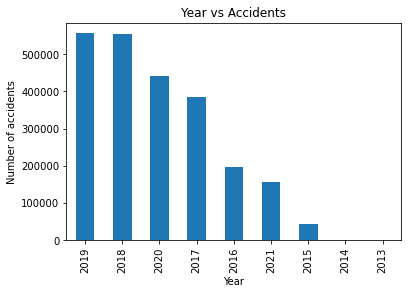

In [42]:
#Plotting the data for visualization of number of crashes occured each year. 
df_final.year.value_counts(sort=True).plot(kind = 'bar',title='Year vs Accidents', xlabel='Year',ylabel='Number of accidents')

Here, we can see that 2019 and 2018 has more number of crashes compared to the year before. And for the year 2021, the data values are available only upto present date. So, the dataset is only till May month where we could not come to a conclusion for the entire year. 

Hypothesis 1: There are crashes taken place every year in Chicago. My first hypothesis is that more crashes are caused by male drivers on roads.

In [43]:
#Creating new dataframe 'new_df' and grouping the fields based on year and gender
new_df = df_final.groupby(['year', 'SEX'])\
      .year.count().unstack()
new_df.columns

Index(['F', 'M', 'X'], dtype='object', name='SEX')

In [44]:
#The new dataframe has 3 columns of female, male and unknown gender. 
new_df.head()
#Data has inconsistencies where some cells has no values or some had unknown gender mentioned as x. So, I considered both as same x as unknown values.

SEX,F,M,X
year,,,
2013,2,2,2
2014,12,6,4
2015,16252,21880,3528
2016,76508,100418,16814
2017,148408,201254,30667


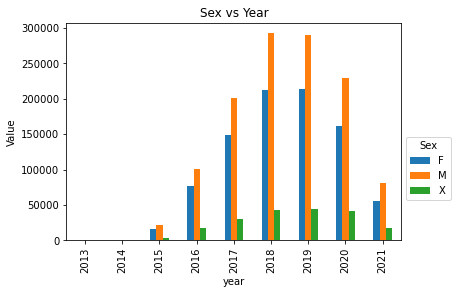

In [45]:
#Bar plot is plotted to know a visualization of the above hypothesis on which gender causes more crashes while driving segregated with year.
new_df

new_df[['F','M','X']].plot(kind='bar')
#title of the bar graph
plt.title('Sex vs Year')
#name for the y axis
plt.ylabel('Value')
#legend outside the plot
plt.legend(loc='upper left',title='Sex', bbox_to_anchor=(1, 0.5))
plt.show()

<AxesSubplot:title={'center':'Gender vs Accidents'}, xlabel='Gender', ylabel='Number of accidents'>

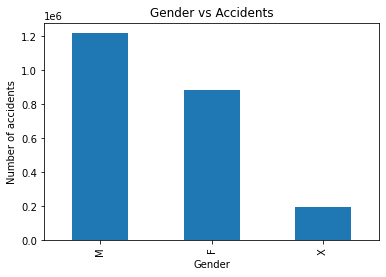

In [46]:
#Plotting the data for visualization of number of crashes done by gender alone. 
df_final.SEX.value_counts(sort=True).plot(kind = 'bar',title='Gender vs Accidents', xlabel='Gender',ylabel='Number of accidents')

Answer: Here, we see that more crashes occured in 2018 and 2019 was identified by males. Usually, they say women tend to be nervous when a sudden rush up comes and stressful situations. But considering the above data, itseems woman drive sturdily and maybe male drivers end up crashing or hitting due to rash driving, or confident driving, or tensions and stresses due to lack of presence of mind while driving. 

Hypothesis 2: There are more crashes/accidents in the weekends. My hypothesis is that weekdays comparatively has less crashes than weekends. Weekends has more crashes considering weekends as Saturday and Sunday alone.  

I did normalization method to analyze this hypothesis. 
Normalization is a process in which we change the range of intensity values to make the values normal to the senses, hence the term normalization. This process is done to eliminate redundancy and inconsistency dependency. 

Here, we have like weekend and weekday and unknown values.So, normalization of values of weekend and weekday are done where 5 values are considered for weekday(Monday-Friday) and 2 values for Weekend(Saturday and Sunday) are considered.The above process is done below. 

Citation: https://www.google.com.sg/amp/s/www.geeksforgeeks.org/data-normalization-with-pandas/amp/

In [47]:
#Converting the date column values into respective standard format for fetching the days of the week!
df_final['WEEKDAY'] = pd.to_datetime(df_final['CRASH_DATE_x']).dt.dayofweek  # monday = 0, sunday = 6

df_final['weekend_indi'] = 0          # Initialize the column with default value of 0
df_final.loc[df_final['WEEKDAY'].isin([5, 6]), 'weekend_indi'] = 1  # 5 and 6 correspond to Sat and Sun

In [48]:
#Here, we can see the crash day of the week in the fifth column
df_final.head(50)

,CRASH_RECORD_ID,CRASH_DATE_x,CRASH_TYPE,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,CRASH_DATE_y,...,MODEL,VEHICLE_YEAR,CRASH_DATE,SEX,AGE,INJURY_CLASSIFICATION,CELL_PHONE_USE,year,WEEKDAY,weekend_indi
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10 17:56:00,NO INJURY / DRIVE AWAY,17,4,7,0.0,0.0,0.0,07/10/2019 05:56:00 PM,...,UNKNOWN,1995.0,07/10/2019 05:56:00 PM,M,31.0,NO INDICATION OF INJURY,NaN,2019,2,0
1,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10 17:56:00,NO INJURY / DRIVE AWAY,17,4,7,0.0,0.0,0.0,07/10/2019 05:56:00 PM,...,UNKNOWN,1995.0,07/10/2019 05:56:00 PM,M,43.0,NO INDICATION OF INJURY,NaN,2019,2,0
2,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10 17:56:00,NO INJURY / DRIVE AWAY,17,4,7,0.0,0.0,0.0,07/10/2019 05:56:00 PM,...,UNKNOWN,1995.0,07/10/2019 05:56:00 PM,M,28.0,NO INDICATION OF INJURY,NaN,2019,2,0
3,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10 17:56:00,NO INJURY / DRIVE AWAY,17,4,7,0.0,0.0,0.0,07/10/2019 05:56:00 PM,...,SENTRA (DATSUN AND NISSAN HAVE MERGED),2012.0,07/10/2019 05:56:00 PM,M,31.0,NO INDICATION OF INJURY,NaN,2019,2,0
4,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10 17:56:00,NO INJURY / DRIVE AWAY,17,4,7,0.0,0.0,0.0,07/10/2019 05:56:00 PM,...,SENTRA (DATSUN AND NISSAN HAVE MERGED),2012.0,07/10/2019 05:56:00 PM,M,43.0,NO INDICATION OF INJURY,NaN,2019,2,0
5,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10 17:56:00,NO INJURY / DRIVE AWAY,17,4,7,0.0,0.0,0.0,07/10/2019 05:56:00 PM,...,SENTRA (DATSUN AND NISSAN HAVE MERGED),2012.0,07/10/2019 05:56:00 PM,M,28.0,NO INDICATION OF INJURY,NaN,2019,2,0
6,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,2017-06-30 16:00:00,INJURY AND / OR TOW DUE TO CRASH,16,6,6,0.0,0.0,0.0,06/30/2017 04:00:00 PM,...,UNKNOWN,2011.0,06/30/2017 04:00:00 PM,F,20.0,NO INDICATION OF INJURY,NaN,2017,4,0
7,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,2017-06-30 16:00:00,INJURY AND / OR TOW DUE TO CRASH,16,6,6,0.0,0.0,0.0,06/30/2017 04:00:00 PM,...,UNKNOWN,2011.0,06/30/2017 04:00:00 PM,F,26.0,NO INDICATION OF INJURY,NaN,2017,4,0
8,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,2017-06-30 16:00:00,INJURY AND / OR TOW DUE TO CRASH,16,6,6,0.0,0.0,0.0,06/30/2017 04:00:00 PM,...,UNKNOWN,2011.0,06/30/2017 04:00:00 PM,M,NaN,NO INDICATION OF INJURY,NaN,2017,4,0
9,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,2017-06-30 16:00:00,INJURY AND / OR TOW DUE TO CRASH,16,6,6,0.0,0.0,0.0,06/30/2017 04:00:00 PM,...,COROLLA,2016.0,06/30/2017 04:00:00 PM,F,20.0,NO INDICATION OF INJURY,NaN,2017,4,0


In [49]:
# Datatype converted into string 
df_final['CRASH_DAY_OF_WEEK'] = df_final['CRASH_DAY_OF_WEEK'].astype(str)

In [50]:
#The values are replaced with the day of the week segregating the values as either weekday or weekend.
#Monday- Friday are considered as weekday and Saturday and Sunday are considered as weekend.
df_final['WEEKEND'] = df_final['CRASH_DAY_OF_WEEK'].replace(['1','2','3','4','5','6','7'],['weekend','weekday','weekday','weekday','weekday','weekend','weekend'])

In [51]:
#The weekday/weekend is mentioned in the below last right end column
df_final.head()

,CRASH_RECORD_ID,CRASH_DATE_x,CRASH_TYPE,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,CRASH_DATE_y,...,VEHICLE_YEAR,CRASH_DATE,SEX,AGE,INJURY_CLASSIFICATION,CELL_PHONE_USE,year,WEEKDAY,weekend_indi,WEEKEND
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10 17:56:00,NO INJURY / DRIVE AWAY,17,4,7,0.0,0.0,0.0,07/10/2019 05:56:00 PM,...,1995.0,07/10/2019 05:56:00 PM,M,31.0,NO INDICATION OF INJURY,NaN,2019,2,0,weekday
1,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10 17:56:00,NO INJURY / DRIVE AWAY,17,4,7,0.0,0.0,0.0,07/10/2019 05:56:00 PM,...,1995.0,07/10/2019 05:56:00 PM,M,43.0,NO INDICATION OF INJURY,NaN,2019,2,0,weekday
2,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10 17:56:00,NO INJURY / DRIVE AWAY,17,4,7,0.0,0.0,0.0,07/10/2019 05:56:00 PM,...,1995.0,07/10/2019 05:56:00 PM,M,28.0,NO INDICATION OF INJURY,NaN,2019,2,0,weekday
3,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10 17:56:00,NO INJURY / DRIVE AWAY,17,4,7,0.0,0.0,0.0,07/10/2019 05:56:00 PM,...,2012.0,07/10/2019 05:56:00 PM,M,31.0,NO INDICATION OF INJURY,NaN,2019,2,0,weekday
4,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10 17:56:00,NO INJURY / DRIVE AWAY,17,4,7,0.0,0.0,0.0,07/10/2019 05:56:00 PM,...,2012.0,07/10/2019 05:56:00 PM,M,43.0,NO INDICATION OF INJURY,NaN,2019,2,0,weekday


In [52]:
#Grouping of values are done for the weekend and weekday based on the respective year. The years considered for analysis are 2013-2021(present day)
df2 = df_final.groupby(['year', 'WEEKEND'])\
      .year.count().unstack()
df2.columns

Index(['weekday', 'weekend'], dtype='object', name='WEEKEND')

In [53]:
#Below is the table with grouped values
df2

WEEKEND,weekday,weekend
year,,
2013,NaN,6.0
2014,18.0,4.0
2015,24134.0,18384.0
2016,112666.0,83703.0
2017,215468.0,169725.0
2018,315765.0,239343.0
2019,314430.0,242192.0
2020,239991.0,200481.0
2021,83337.0,73361.0


In [54]:
#dividing weekday by 5 since there are 5 days in weekday. So, normalizing the values by dividing by 5
df2['weekday']=df2['weekday']/5


In [55]:
df2
#cleaning data
#only during the year 2013 we know the values of unknown 
#we can treat the NaN value as zero since we are not sure of the value
df2.fillna(0, inplace=True)

In [56]:
#Nan value filled with zero value in 2013 year weekday for easy analysis
df2

WEEKEND,weekday,weekend
year,,
2013,0.0,6.0
2014,3.6,4.0
2015,4826.8,18384.0
2016,22533.2,83703.0
2017,43093.6,169725.0
2018,63153.0,239343.0
2019,62886.0,242192.0
2020,47998.2,200481.0
2021,16667.4,73361.0


In [57]:
#dividing the weekend column value by 2 since there are 2 days in weekend
df2['weekend']=df2['weekend']//2

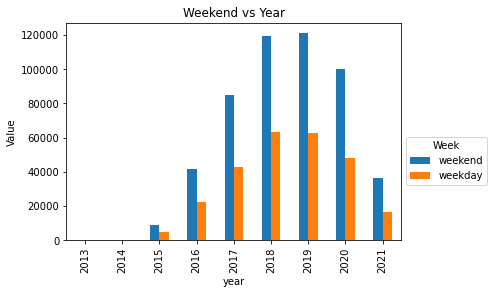

In [58]:
#Bar plot is plotted to know a visualization of the above hypothesis on which day of the week, crashes happen more.
df2

df2[['weekend','weekday']].plot(kind='bar')
#title of the bar graph
plt.title('Weekend vs Year')
#name for the y axis
plt.ylabel('Value')
#legend outside the plot
plt.legend(loc='upper left',title='Week', bbox_to_anchor=(1, 0.5))
plt.show()

Answer: Here, we see that weekends has comparatively higher ratio of crashes than weekdays. Though we say everyone tends to be in pressure in weekdays due to work tensions and family pressures, we see more crashes on weekends. So, my hypotheis is right. And even though people tend to travel quite a lot for work and evening grocery shopping during weekdays, during weekends they chill out and entertain themselves. The wrong assumption was more people took break for travel during weekends. Seeing this data, we can say that people hang out more during weekends and party more and hang out in weekends. Maybe there are driving with consumption of drugs and alcohol that tend to lose control of the vehicle while driving. 

I had a curiosity to know whether there are more crashes during festival seasons or summer where people hang out more rather than seasons which require more of indoor work. Let's see!

In [59]:
#conversion of date to standard format for fetching the respective months
df_final['CRASH_DATE_x'] = pd.to_datetime(df_final['CRASH_DATE_x'])


In [60]:
#Fetching datatypes to check the exact datatype for conversion
df_final.dtypes
#We see that the day of the week is in object and month is in integer

CRASH_RECORD_ID                    object
CRASH_DATE_x               datetime64[ns]
CRASH_TYPE                         object
CRASH_HOUR                          int64
CRASH_DAY_OF_WEEK                  object
CRASH_MONTH                         int64
INJURIES_TOTAL                    float64
INJURIES_FATAL                    float64
INJURIES_INCAPACITATING           float64
CRASH_DATE_y                       object
NUM_PASSENGERS                    float64
MAKE                               object
MODEL                              object
VEHICLE_YEAR                      float64
CRASH_DATE                         object
SEX                                object
AGE                               float64
INJURY_CLASSIFICATION              object
CELL_PHONE_USE                     object
year                                int64
WEEKDAY                             int64
weekend_indi                        int64
WEEKEND                            object
dtype: object

In [61]:
import calendar
# Number of accident per month
#pd.to_datetime and grouped by crash month
accidents_month = df_final.groupby(df_final['CRASH_DATE_x'].dt.month).count().CRASH_DATE_x

# Replace the month integers by month names.
accidents_month.index=[calendar.month_name[x] for x in range(1,13)]

accidents_month
#Reading the data for the crashes during various months

January      190652
February     186750
March        192848
April        183597
May          188046
June         179466
July         188611
August       197023
September    202855
October      218407
November     199134
December     205619
Name: CRASH_DATE_x, dtype: int64

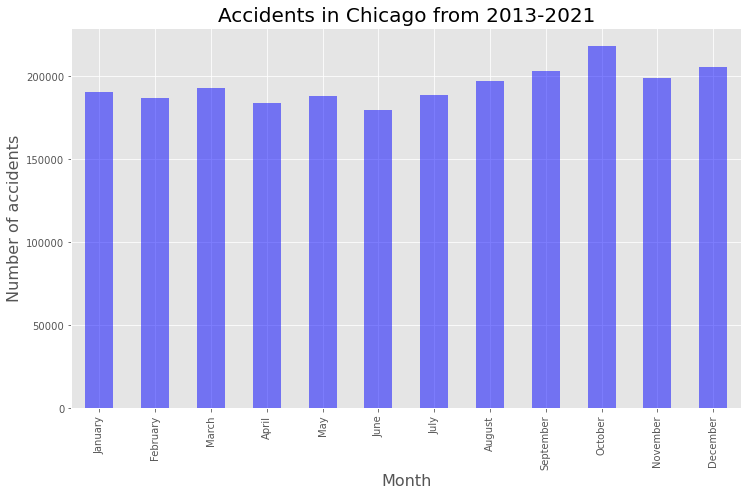

In [62]:
# Plotting the data to see which month has more crashes in the years range of 2013-present
import matplotlib.pyplot as plt
#% matplotlib inline
plt.style.use('ggplot')

# plot accidents per month
accidents_month.plot(kind='bar',figsize=(12,7), color='blue', alpha=0.5)

# title and x,y labels
plt.title('Accidents in Chicago from 2013-2021', fontsize=20)
plt.xlabel('Month',fontsize=16)
plt.ylabel('Number of accidents',fontsize=16);

Answer: My hypothesis is wrong. Apparently all months have more or less equal number of crashes. If at all, maybe during October people tend to hangout more during fall before winter sets-in by Novemeber(as cases are little more in October)

Hypothesis 3: Due to American strict norms and regulations, I have an hypothesis where fatal accidents are very less in Chicago where people tend to follow quite a distance between each cars, good making of the car design and maintain a steady speed so that even if crashes happen it's not something serious for people inside. 

In [63]:
#Grouping the data based on injury classification
df_df=df_final.groupby(['year','INJURY_CLASSIFICATION']).size().unstack()


In [64]:
#Grouped data displayed
df_df

INJURY_CLASSIFICATION,FATAL,INCAPACITATING INJURY,NO INDICATION OF INJURY,NONINCAPACITATING INJURY,Not known,"REPORTED, NOT EVIDENT"
year,,,,,,
2013,NaN,NaN,2.0,NaN,NaN,4.0
2014,NaN,NaN,20.0,2.0,NaN,NaN
2015,5.0,140.0,40987.0,557.0,32.0,797.0
2016,26.0,737.0,188485.0,3464.0,151.0,3506.0
2017,176.0,3235.0,356374.0,14812.0,371.0,10225.0
2018,303.0,5420.0,505563.0,27577.0,391.0,15854.0
2019,253.0,5587.0,505599.0,28760.0,247.0,16176.0
2020,481.0,5399.0,392699.0,27629.0,150.0,14114.0
2021,109.0,1607.0,141516.0,8818.0,61.0,4587.0


In [65]:
#DATA CLEANING
#Replacing the Nan values with zero 
df_df.fillna(0, inplace=True)
df_df

INJURY_CLASSIFICATION,FATAL,INCAPACITATING INJURY,NO INDICATION OF INJURY,NONINCAPACITATING INJURY,Not known,"REPORTED, NOT EVIDENT"
year,,,,,,
2013,0.0,0.0,2.0,0.0,0.0,4.0
2014,0.0,0.0,20.0,2.0,0.0,0.0
2015,5.0,140.0,40987.0,557.0,32.0,797.0
2016,26.0,737.0,188485.0,3464.0,151.0,3506.0
2017,176.0,3235.0,356374.0,14812.0,371.0,10225.0
2018,303.0,5420.0,505563.0,27577.0,391.0,15854.0
2019,253.0,5587.0,505599.0,28760.0,247.0,16176.0
2020,481.0,5399.0,392699.0,27629.0,150.0,14114.0
2021,109.0,1607.0,141516.0,8818.0,61.0,4587.0


array([<AxesSubplot:ylabel='2013'>, <AxesSubplot:ylabel='2014'>,
       <AxesSubplot:ylabel='2015'>, <AxesSubplot:ylabel='2016'>,
       <AxesSubplot:ylabel='2017'>, <AxesSubplot:ylabel='2018'>,
       <AxesSubplot:ylabel='2019'>, <AxesSubplot:ylabel='2020'>,
       <AxesSubplot:ylabel='2021'>], dtype=object)

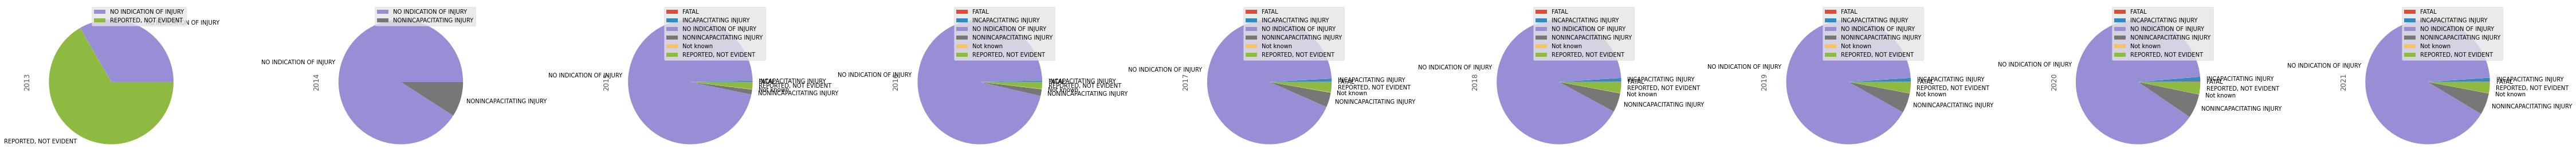

In [66]:
#Plotting the data based on five categories of where fatal accidents will be displayed by RED color. 
df_df.T.plot.pie(subplots=True, figsize=(80, 5))

Text(0.5, 1.0, 'Year Vs Injury classification')

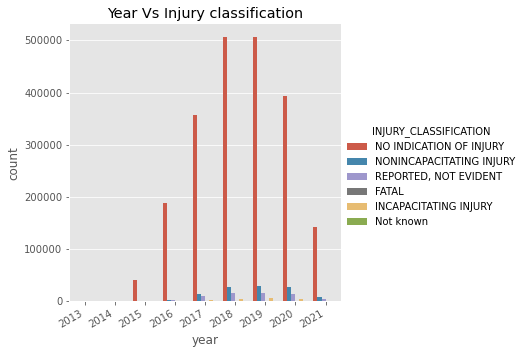

In [67]:
#Plotting the same pie chart in bar chart for easy visualization
ax=sns.catplot(x="year", kind="count", hue="INJURY_CLASSIFICATION", data=df_final)
ax.fig.autofmt_xdate()
plt.title("Year Vs Injury classification")

Answer: We see that fatal accidents are really very low and due to strict rules and regulations, lives of the people are saved unlike few states in other parts of the world have high number of fatal accidents and on the spot deaths. 

This is not a hypothesis. I was curious to know which car make has more crashes which gives a clear view that the car design definitely needs to be changed or some kind of alterations needs to happen. Let's see!

In [68]:
#Top 10 cars makes that had the highest number of accidents 
c=df_final['MAKE'].value_counts(sort=True).nlargest(10)

<AxesSubplot:title={'center':'Make vs Crashes'}, xlabel='Car Make', ylabel='Number of crashes'>

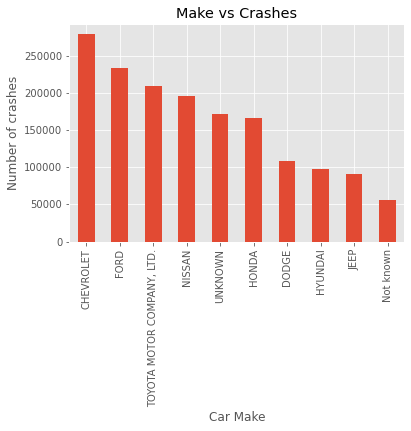

In [69]:
#Plotting the number of crashes Vs. the brand of the car which was identified with more crashes
df_final.MAKE.value_counts(sort=True).nlargest(10).plot(kind = 'bar',title='Make vs Crashes', xlabel='Car Make',ylabel='Number of crashes')

Seeing this, we can definitely conclude that Chevrolet, Ford and Toyota motors needs to work on their analysis of car design, engine model or brake system so that the word of mouth doesn't spread defying their car brand names. 

Hypothesis 4: I had a proposition that there will definitely be a change of number of crashes in pre-covid and during-covid in Chicago, that is during 2019 and 2020. There will be high difference of number of crashes in 2019 and 2020 as in 2020, the country faced a complete lockdown and many worked in Work from Home. Let's see!

In [70]:
# selecting rows based on condition 
#Assigning the dataframe to rslt_df for the year 2020
rslt_df = df_final[df_final['year'] == 2019]

In [71]:
#Reading the dataframe
rslt_df

,CRASH_RECORD_ID,CRASH_DATE_x,CRASH_TYPE,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,CRASH_DATE_y,...,VEHICLE_YEAR,CRASH_DATE,SEX,AGE,INJURY_CLASSIFICATION,CELL_PHONE_USE,year,WEEKDAY,weekend_indi,WEEKEND
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10 17:56:00,NO INJURY / DRIVE AWAY,17,4,7,0.0,0.0,0.0,07/10/2019 05:56:00 PM,...,1995.0,07/10/2019 05:56:00 PM,M,31.0,NO INDICATION OF INJURY,NaN,2019,2,0,weekday
1,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10 17:56:00,NO INJURY / DRIVE AWAY,17,4,7,0.0,0.0,0.0,07/10/2019 05:56:00 PM,...,1995.0,07/10/2019 05:56:00 PM,M,43.0,NO INDICATION OF INJURY,NaN,2019,2,0,weekday
2,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10 17:56:00,NO INJURY / DRIVE AWAY,17,4,7,0.0,0.0,0.0,07/10/2019 05:56:00 PM,...,1995.0,07/10/2019 05:56:00 PM,M,28.0,NO INDICATION OF INJURY,NaN,2019,2,0,weekday
3,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10 17:56:00,NO INJURY / DRIVE AWAY,17,4,7,0.0,0.0,0.0,07/10/2019 05:56:00 PM,...,2012.0,07/10/2019 05:56:00 PM,M,31.0,NO INDICATION OF INJURY,NaN,2019,2,0,weekday
4,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10 17:56:00,NO INJURY / DRIVE AWAY,17,4,7,0.0,0.0,0.0,07/10/2019 05:56:00 PM,...,2012.0,07/10/2019 05:56:00 PM,M,43.0,NO INDICATION OF INJURY,NaN,2019,2,0,weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332823,feffdab05baab33523892d8f42f5cb4de1b6b355125d5f...,2019-10-04 17:08:00,NO INJURY / DRIVE AWAY,17,6,10,0.0,0.0,0.0,10/04/2019 05:08:00 PM,...,NaN,10/04/2019 05:08:00 PM,M,84.0,NO INDICATION OF INJURY,NaN,2019,4,0,weekend
2332824,feffdab05baab33523892d8f42f5cb4de1b6b355125d5f...,2019-10-04 17:08:00,NO INJURY / DRIVE AWAY,17,6,10,0.0,0.0,0.0,10/04/2019 05:08:00 PM,...,2015.0,10/04/2019 05:08:00 PM,M,84.0,NO INDICATION OF INJURY,NaN,2019,4,0,weekend
2332825,feffdab05baab33523892d8f42f5cb4de1b6b355125d5f...,2019-10-04 17:08:00,NO INJURY / DRIVE AWAY,17,6,10,0.0,0.0,0.0,10/04/2019 05:08:00 PM,...,2015.0,10/04/2019 05:08:00 PM,F,68.0,NO INDICATION OF INJURY,NaN,2019,4,0,weekend
2332826,feffdab05baab33523892d8f42f5cb4de1b6b355125d5f...,2019-10-04 17:08:00,NO INJURY / DRIVE AWAY,17,6,10,0.0,0.0,0.0,10/04/2019 05:08:00 PM,...,2015.0,10/04/2019 05:08:00 PM,F,68.0,NO INDICATION OF INJURY,NaN,2019,4,0,weekend


In [72]:
#Assigning the dataframe to rslt_df1 for the year 2020
rslt_df1 = df_final[df_final['year'] == 2020]

In [73]:
#Reading the dataframe
rslt_df1

,CRASH_RECORD_ID,CRASH_DATE_x,CRASH_TYPE,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,CRASH_DATE_y,...,VEHICLE_YEAR,CRASH_DATE,SEX,AGE,INJURY_CLASSIFICATION,CELL_PHONE_USE,year,WEEKDAY,weekend_indi,WEEKEND
12,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,2020-07-10 10:25:00,NO INJURY / DRIVE AWAY,10,6,7,0.0,0.0,0.0,07/10/2020 10:25:00 AM,...,2012.0,07/10/2020 10:25:00 AM,M,50.0,NO INDICATION OF INJURY,NaN,2020,4,0,weekend
13,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,2020-07-10 10:25:00,NO INJURY / DRIVE AWAY,10,6,7,0.0,0.0,0.0,07/10/2020 10:25:00 AM,...,2012.0,07/10/2020 10:25:00 AM,F,37.0,NO INDICATION OF INJURY,NaN,2020,4,0,weekend
14,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,2020-07-10 10:25:00,NO INJURY / DRIVE AWAY,10,6,7,0.0,0.0,0.0,07/10/2020 10:25:00 AM,...,2012.0,07/10/2020 10:25:00 AM,M,47.0,NO INDICATION OF INJURY,NaN,2020,4,0,weekend
15,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,2020-07-10 10:25:00,NO INJURY / DRIVE AWAY,10,6,7,0.0,0.0,0.0,07/10/2020 10:25:00 AM,...,2002.0,07/10/2020 10:25:00 AM,M,50.0,NO INDICATION OF INJURY,NaN,2020,4,0,weekend
16,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,2020-07-10 10:25:00,NO INJURY / DRIVE AWAY,10,6,7,0.0,0.0,0.0,07/10/2020 10:25:00 AM,...,2002.0,07/10/2020 10:25:00 AM,F,37.0,NO INDICATION OF INJURY,NaN,2020,4,0,weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332807,328aa44a707d1a02829d2e967d7980d6b772f4d2ce157a...,2020-08-14 13:45:00,NO INJURY / DRIVE AWAY,13,6,8,0.0,0.0,0.0,08/14/2020 01:45:00 PM,...,2001.0,08/14/2020 01:45:00 PM,F,30.0,NO INDICATION OF INJURY,NaN,2020,4,0,weekend
2332808,328aa44a707d1a02829d2e967d7980d6b772f4d2ce157a...,2020-08-14 13:45:00,NO INJURY / DRIVE AWAY,13,6,8,0.0,0.0,0.0,08/14/2020 01:45:00 PM,...,2019.0,08/14/2020 01:45:00 PM,F,27.0,NO INDICATION OF INJURY,NaN,2020,4,0,weekend
2332809,328aa44a707d1a02829d2e967d7980d6b772f4d2ce157a...,2020-08-14 13:45:00,NO INJURY / DRIVE AWAY,13,6,8,0.0,0.0,0.0,08/14/2020 01:45:00 PM,...,2019.0,08/14/2020 01:45:00 PM,F,30.0,NO INDICATION OF INJURY,NaN,2020,4,0,weekend
2332810,328aa44a707d1a02829d2e967d7980d6b772f4d2ce157a...,2020-08-14 13:45:00,NO INJURY / DRIVE AWAY,13,6,8,0.0,0.0,0.0,08/14/2020 01:45:00 PM,...,2019.0,08/14/2020 01:45:00 PM,F,NaN,NO INDICATION OF INJURY,NaN,2020,4,0,weekend


In [74]:
#Assigning the values based on year respectively along with major crash types
values = rslt_df['CRASH_TYPE'].value_counts().keys().tolist()
counts = rslt_df['CRASH_TYPE'].value_counts().tolist()
labels_gender = rslt_df1['CRASH_TYPE'].value_counts().keys().tolist()
sizes_gender = rslt_df1['CRASH_TYPE'].value_counts().tolist()
labels=values
sizes=counts

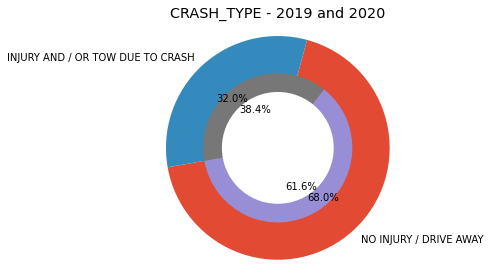

In [75]:
#Plotting the donut graph for clear visualization comparison of 2019 and 2020
import matplotlib.pyplot as plt

explode = (0.2,0.2,0.2,0.2,0.2) 
explode_gender = (0.1,0.1,0.1,0.1,0.1)
#Plot
plt.pie(sizes, labels=labels,autopct='%1.1f%%', startangle=190,frame=True, explode=None,radius=3)
plt.pie(sizes_gender,autopct='%1.1f%%',startangle=190, explode=None,radius=2 )
#Draw circle
centre_circle = plt.Circle((0,0),1.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('CRASH_TYPE - 2019 and 2020') 
plt.axis('equal')
plt.tight_layout()
plt.show()

Citation: https://towardsdatascience.com/donut-plot-with-matplotlib-python-be3451f22704

Answer: We see that there are no major changes in 2 years even though there was complete lockdown in 2020. There are only few changes of less number of cases reported in 2020. My hypothesis is wrong. This maybe because last year many faced hardships and severe loss of jobs and uncertain situations in life bringing in stresses which would have reflected while driving. 

Conclusion: After the analysis of the data, I understand that few generic understandings become wrong while looking into the actual data. In looking into my hypothesis, I see that car make(brand) plays a major role in crashes. Also, 2020 had so many vehicles moving around even though there was a strict lockdown. Most of the crashes had no indication of injury but only crashes due to some unavoidable hits where the car designing can be bettered. There are no classification or prediction that people hangout more during any specific day of the week where anyone can drive without any norms or carelessness. Driving is something to be done seriously with cautiousness and safety precautions so that no money is spent on after crash effects.

Lessons learnt: It's all about data where any analysis can be done. I was looking into 'N' number of data for many days and still ended up doing analysis 3 times for 2 different sets of data before which ended up to be waste as the data was not legit even though taken from recognizaed websites. So, datascience is mostly about how we record the data where analysis can be done. And as datascience is all about aritifical intelligence in future, an open mind of inclusivity of all data is definitely required for best results and analysis for future world. Because careless exclusiveness of some data may be the actual cause of some new beginnings or new problems. 